In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn import cluster, preprocessing
import scipy 
import seaborn as sns
import folium
import geopy

%matplotlib inline

In [2]:
dataset=pd.read_csv("goibibo_com-travel_sample.csv")
dataset.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


In [3]:
dataset.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

In [4]:
z= ["latitude","longitude"]
data= dataset[z]
df=pd.DataFrame(data)
df

,latitude,longitude
0,32.139387,77.154660
1,28.472097,77.072546
2,15.548398,73.757634
3,32.223603,77.185900
4,28.646777,77.212735
...,...,...
3995,23.179301,75.784910
3996,23.004443,72.552796
3997,19.110926,72.879038
3998,24.511849,86.696999


In [5]:
df.isna().sum()

latitude     0
longitude    0
dtype: int64

In [6]:
lower_bound = df['latitude'].quantile(0.01)
upper_bound = df['latitude'].quantile(0.99)
dfcopy2 = df[(df['latitude'] > lower_bound) & (df['latitude'] < upper_bound)]

lower_bound = df['longitude'].quantile(0.01)
upper_bound = df['longitude'].quantile(0.99)
df = df[(df['longitude'] > lower_bound) & (df['longitude'] < upper_bound)]

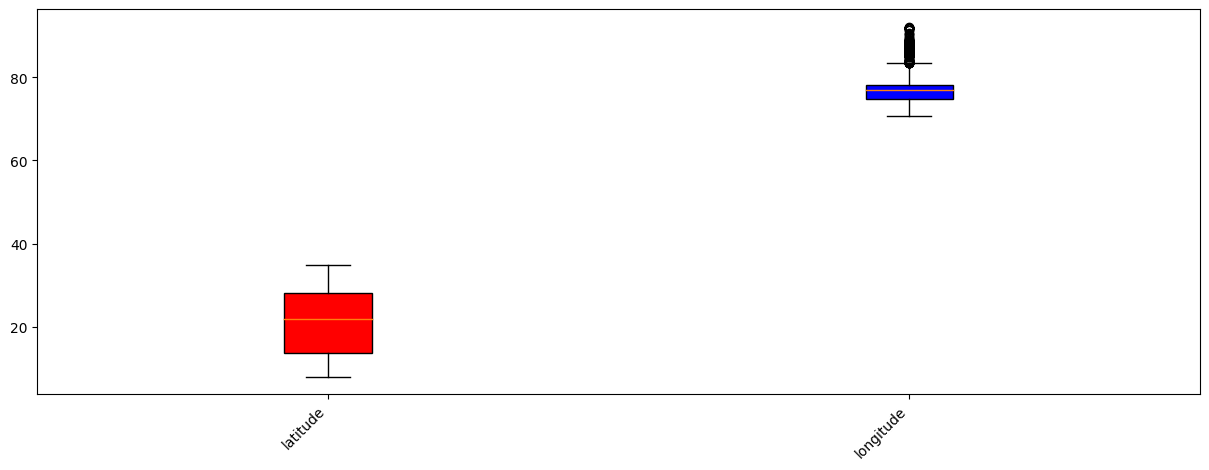

In [7]:
colors=["red", "blue"]
plt.figure(figsize=(15,5))
box = plt.boxplot(df, labels=z, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(rotation=45, ha='right')
plt.show()

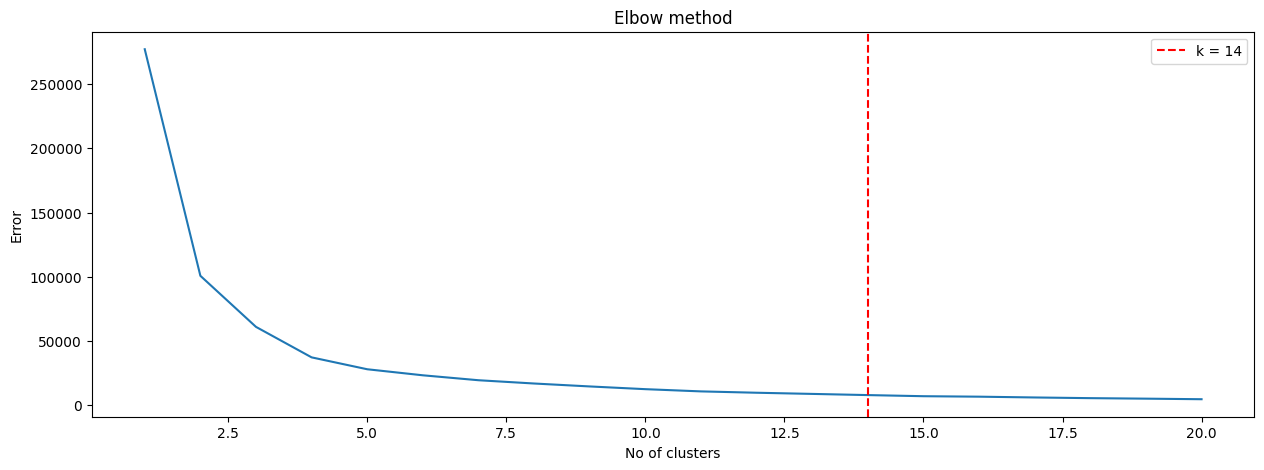

In [8]:
Error=[]
r= range(1,21)
for i in r:
    kmeans= cluster.KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    Error.append(kmeans.inertia_)
k = [i*100 for i in np.diff(Error,2)].index(min([i*100 for i 
     in np.diff(Error,2)]))
plt.figure(figsize=(15,5))
plt.plot(r, Error)
plt.axvline(k, ls='--', color='red', label='k = '+str(k))
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.legend()

In [9]:
x=["latitude","longitude","room_type","site_review_rating","address"]
data2= dataset[x]
df2=pd.DataFrame(data2)
df2= df2.dropna()
df2

,latitude,longitude,room_type,site_review_rating,address
0,32.139387,77.154660,Deluxe Room,4.0,"15th Mile, N.H.21,Manali, District Kullu,Himac..."
1,28.472097,77.072546,Deluxe Room With Free WIFI,4.5,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S..."
2,15.548398,73.757634,Standard Room,2.5,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan..."
3,32.223603,77.185900,Deluxe Room,5.0,Simsa
4,28.646777,77.212735,Standard Room Non AC,2.8,"8180 Street No.-6,Arakashan Road,Paharganj"
...,...,...,...,...,...
3992,24.575598,73.696959,Deluxe Non A/c Room,4.2,"sarvaritu vilas , inside udaipole , opp sagasj..."
3993,16.690042,74.456394,Suite Room,5.0,"Near Yasholaxmi Nagar, Kolhapur Rd,"
3994,25.222694,75.878170,AC ROOM,3.4,"Near Railway Station , Kota Jn"
3997,19.110926,72.879038,Gold Room,4.0,"Marol Maroshi Road, Near To Marol naka FireBri..."


In [10]:
lat=df2["latitude"] 
lon=df2["longitude"] 
k = 10
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = df2[["latitude","longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
df2[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
df2

C:\Users\rahul\AppData\Local\Temp\ipykernel_22268\3339520949.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,latitude,longitude,room_type,site_review_rating,address,cluster,centroids
0,32.139387,77.154660,Deluxe Room,4.0,"15th Mile, N.H.21,Manali, District Kullu,Himac...",7,0
1,28.472097,77.072546,Deluxe Room With Free WIFI,4.5,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",0,0
2,15.548398,73.757634,Standard Room,2.5,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",4,0
3,32.223603,77.185900,Deluxe Room,5.0,Simsa,7,0
4,28.646777,77.212735,Standard Room Non AC,2.8,"8180 Street No.-6,Arakashan Road,Paharganj",0,0
...,...,...,...,...,...,...,...
3992,24.575598,73.696959,Deluxe Non A/c Room,4.2,"sarvaritu vilas , inside udaipole , opp sagasj...",6,0
3993,16.690042,74.456394,Suite Room,5.0,"Near Yasholaxmi Nagar, Kolhapur Rd,",4,0
3994,25.222694,75.878170,AC ROOM,3.4,"Near Railway Station , Kota Jn",6,0
3997,19.110926,72.879038,Gold Room,4.0,"Marol Maroshi Road, Near To Marol naka FireBri...",4,0


Text(0.5, 1.0, 'Clustering (k=10)')

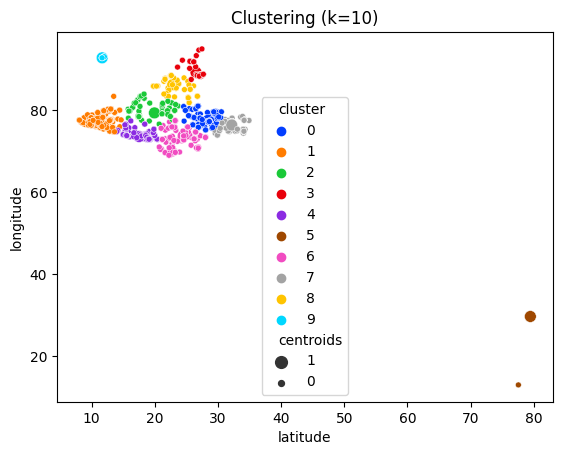

In [11]:
model = cluster.AffinityPropagation()

k = df2["cluster"].nunique()
sns.scatterplot(x="latitude", y="longitude", data=df2,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [12]:
city = "Bhopal"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
"[lat, long]:", location

Bhopal, Huzur Tahsil, Bhopal, Madhya Pradesh, 462001, India


('[lat, long]:', [23.2584857, 77.401989])

In [13]:
x, y = "latitude", "longitude"
color = "cluster"
size = "site_review_rating"
popup = "address"
marker = "centroids"
data = df2.copy()
## create color column
lst_elements = sorted(list(df2[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(df2[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_